In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv("/content/diabetes_dataset.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
print("Missing values in each column:")
print(df.isnull().sum())

df = df.dropna()  # Drop missing values



Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Convert categorical columns
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le



In [15]:
X = df.drop(columns=["Outcome"])  # Assuming 'Outcome' is the target column
y = df["Outcome"]



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [18]:
y_pred_gini = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)


In [19]:
dt_gini_depth3 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_gini_depth3.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

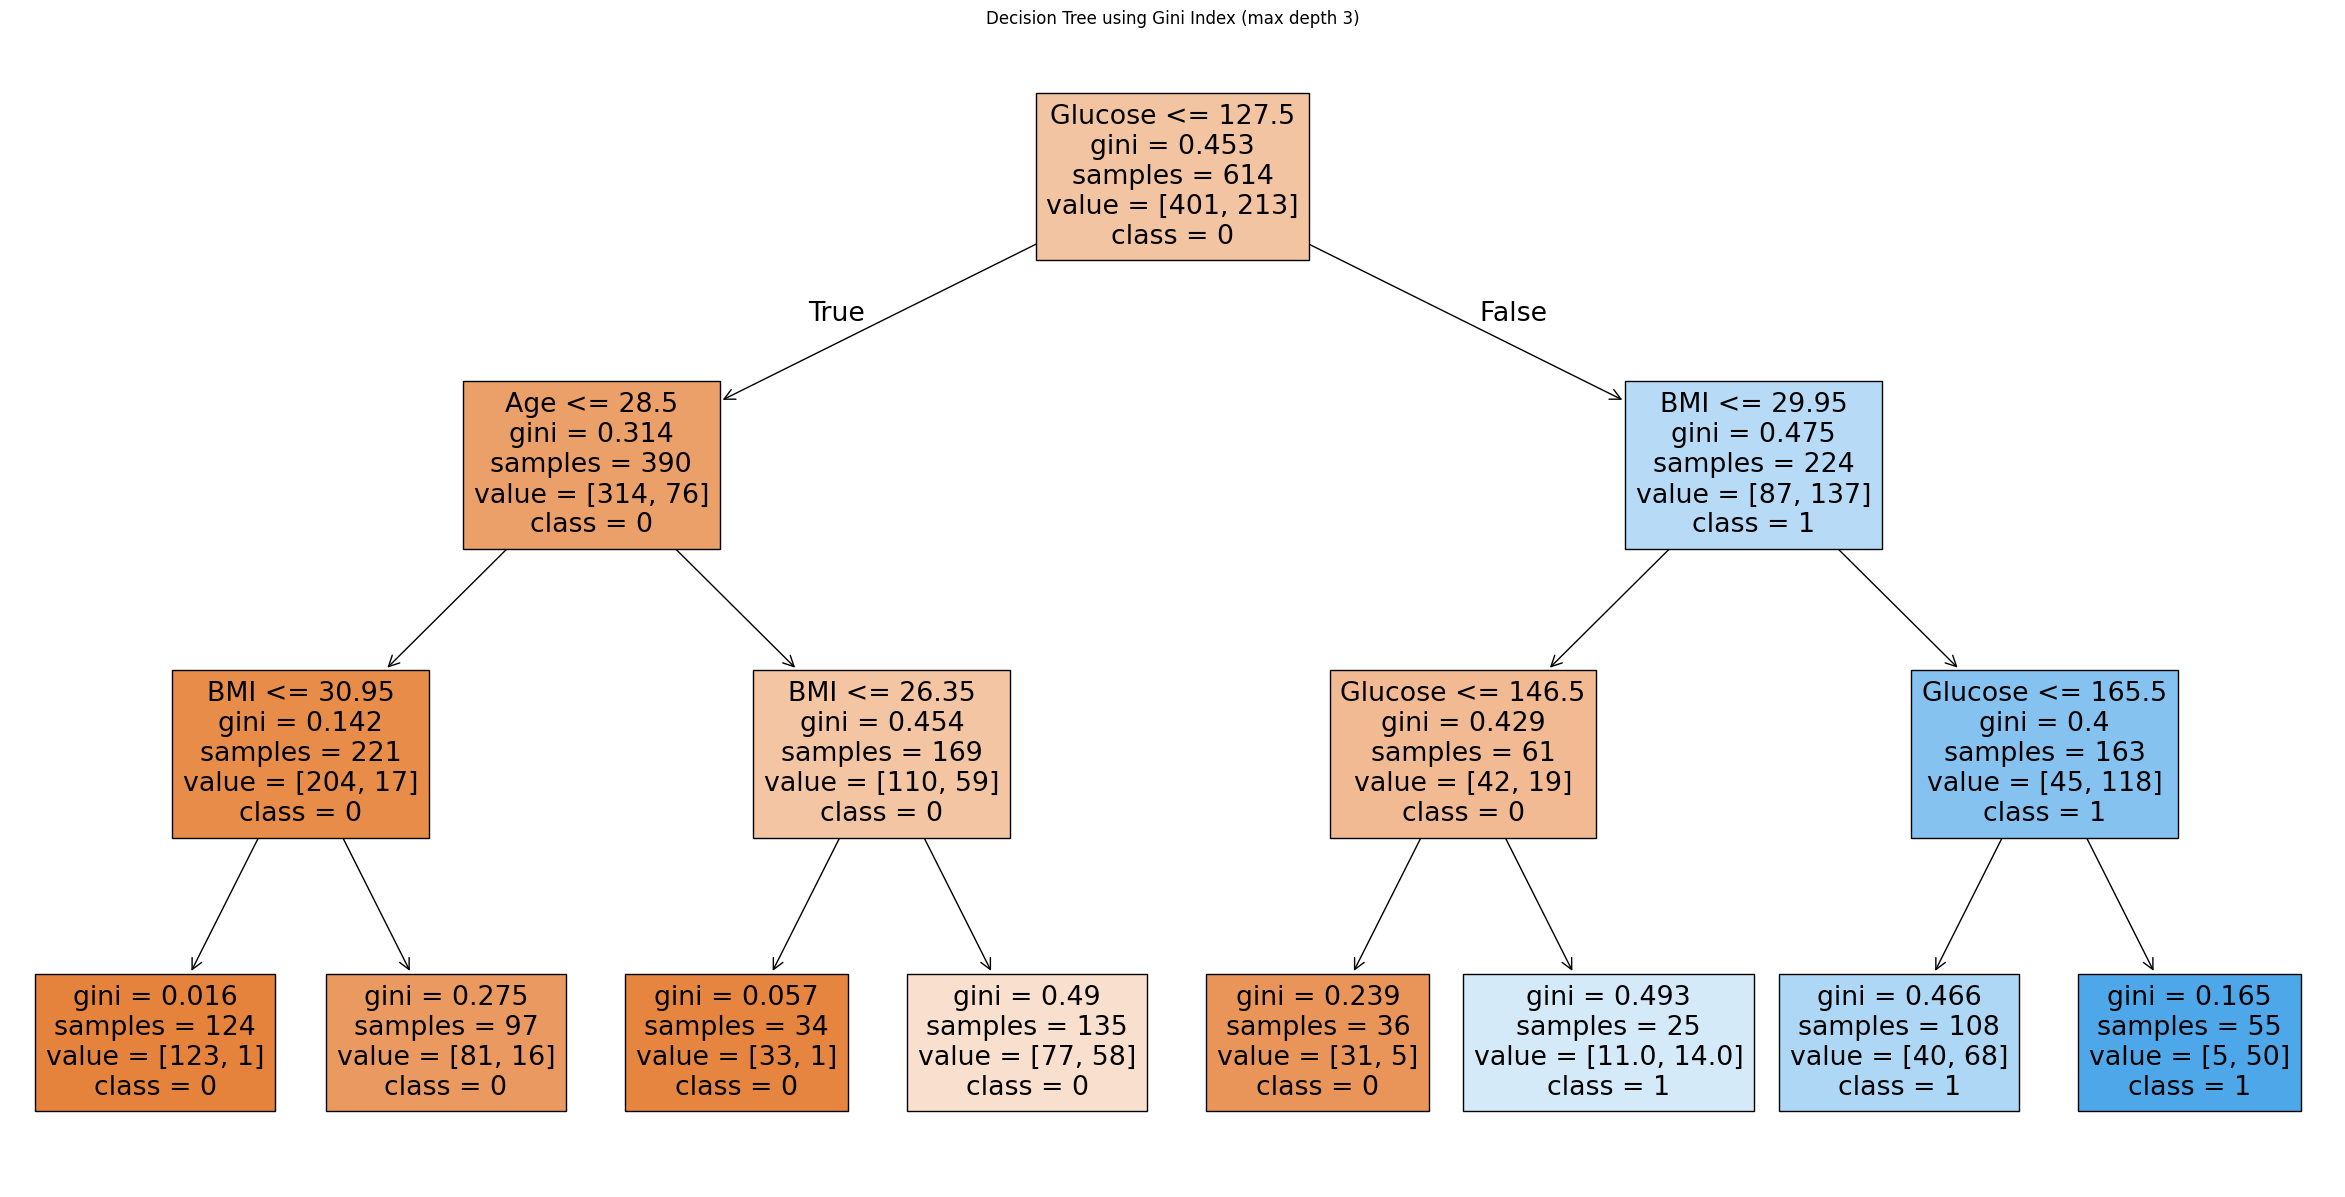

In [20]:
plt.figure(figsize=(30, 15))
plot_tree(dt_gini_depth3, feature_names=X.columns, class_names=[str(cls) for cls in set(y)], filled=True)
plt.title("Decision Tree using Gini Index (max depth 3)")
plt.show()


In [21]:
print(f"Accuracy using Gini Index: {accuracy_gini:.4f}")


Accuracy using Gini Index: 0.7468


In [22]:
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [23]:
y_pred_entropy = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)


In [24]:
print(f"Accuracy using Entropy: {accuracy_entropy:.4f}")


Accuracy using Entropy: 0.7208
